# Problema de Transporte

Un Problema de Transporte consiste básicamente en determinar una política de distribución óptima que permita satisfacer los requerimientos de un determinado número de clientes asociado a la capacidad o logística de un cierto conjunto de oferentes.



Problema de Transporte resuelto con Solver de Excel en:

(https://www.gestiondeoperaciones.net/programacion_lineal/problema-de-transporte-resuelto-con-solver-de-excel/)


A continuación se presenta probablemente el caso más simple a considerar para un **Problema de Transporte.**

Asumamos que tenemos **2 fablicas (P1 y P2)** con capacidad de producción de **160.000** y **120.000** unidades de un producto homogéneo. 

Estas fablicas deben abastecer a **3 clientes (C1, C2 y C3)** con demandas unitarias de **80.000, 70.000 y 90.000 unidades,** respectivamente. 

El gráfico a continuación muestra sobre las flechas los costos unitarios de transporte entre un origen (oferente) a un cliente (demandante).



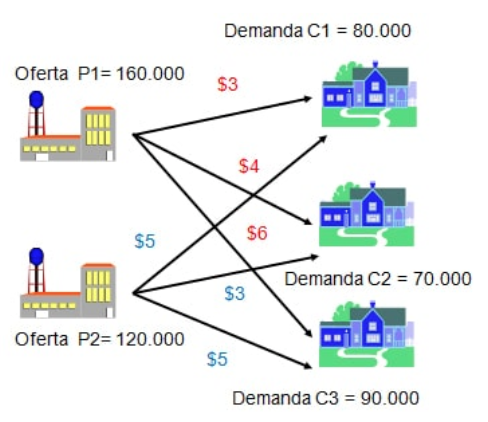

El problema consiste en determinar una política óptima de abastecimiento desde los oferentes a los demandantes de modo de cumplir los requerimientos y lograr los costos más bajos posibles. Para ello definiremos el siguiente modelo de Programación Lineal

##  Variables de Decisión:

$X_{ij}$ : Unidades Transportadas desde la Planta $i$ hasta el Cliente $j$ (Con $i=1,2,$ y $j=1,2,3$)

##  Función Objetivo:

Consiste en minimizar la función que representa los costos de transporte entre los oferentes y los demandantes.

In [94]:
import pandas as pd
from pyomo.environ import *

In [95]:
costos = pd.read_excel("Transporte.xlsx",sheetname="Costos",index_col="Fabricas")
ofertas = pd.read_excel("Transporte.xlsx",sheetname="Oferta",index_col="Fabricas")
demandas = pd.read_excel("Transporte.xlsx",sheetname="Demanda",index_col="Clientes")

In [96]:
costos

,Cliente1,Cliente2,Cliente3
Fabricas,,,
Fabrica1,3,4,6
Fabrica2,5,3,5


In [97]:
ofertas

,Oferta
Fabricas,
Fabrica1,160000
Fabrica2,120000


In [98]:
demandas

,Demanda
Clientes,
Cliente1,80000
Cliente2,70000
Cliente3,90000


In [99]:
Nfabricas= costos.index.tolist() 
Nclientes=costos.columns.tolist()

In [100]:
Nfabricas,Nclientes

(['Fabrica1', 'Fabrica2'], ['Cliente1', 'Cliente2', 'Cliente3'])

In [101]:
# Crear modelo
model = ConcreteModel(name="Ruta de Transporte")

In [102]:
model.x = Var(Nfabricas, Nclientes, bounds=(0.0,None), doc='Cantidad enviada')

In [103]:
model.x.pprint()

x : Cantidad enviada
    Size=6, Index=x_index, Domain=Reals
    Key                      : Lower : Value : Upper : Fixed : Stale
    ('Fabrica1', 'Cliente1') :   0.0 :  None :  None : False :  True
    ('Fabrica1', 'Cliente2') :   0.0 :  None :  None : False :  True
    ('Fabrica1', 'Cliente3') :   0.0 :  None :  None : False :  True
    ('Fabrica2', 'Cliente1') :   0.0 :  None :  None : False :  True
    ('Fabrica2', 'Cliente2') :   0.0 :  None :  None : False :  True
    ('Fabrica2', 'Cliente3') :   0.0 :  None :  None : False :  True


In [104]:
# Cuidado con los espacios en blanco :'( 
model.x.keys()

[('Fabrica1', 'Cliente2'),
 ('Fabrica1', 'Cliente1'),
 ('Fabrica1', 'Cliente3'),
 ('Fabrica2', 'Cliente2'),
 ('Fabrica2', 'Cliente1'),
 ('Fabrica2', 'Cliente3')]

In [105]:
costos.loc["Fabrica1","Cliente1"]

3

In [106]:
# Objetivo
def objective_rule(model):
    return sum(costos.loc[i,j]*model.x[i,j] for i in Nfabricas for j in Nclientes)

model.objective = Objective(rule=objective_rule, sense=minimize, doc='Define los objectivos de la funcion')

In [107]:
Nfabricas,Nclientes

(['Fabrica1', 'Fabrica2'], ['Cliente1', 'Cliente2', 'Cliente3'])

In [108]:
ofertas.columns,ofertas.index

(Index(['Oferta'], dtype='object'),
 Index(['Fabrica1', 'Fabrica2'], dtype='object', name='Fabricas'))

In [109]:
ofertas.Oferta["Fabrica1"]

160000

In [110]:
demandas.Demanda["Cliente2"]

70000

In [114]:
model.x['Fabrica2','Cliente2']

In [112]:
# Constrains ofertas
#Capacidad de planta 1 y 2
def supply_rule(model, i):
    return sum(model.x[i,j] for j in Nclientes) <= ofertas.Oferta[i]

model.supply = Constraint(Nfabricas, rule=supply_rule, doc='Capacidad de suplir en la planta i')


In [113]:
def demand_rule(model, j):
    return sum(model.x[i,j] for i in Nfabricas) >= demandas.Demanda[j]

model.demand = Constraint(Nclientes, rule=demand_rule, doc='Satisfacer demanda del mercado j')

In [118]:
solver = SolverFactory('ipopt')
status = solver.solve(model)

print("Status = %s" % status.solver.termination_condition)

for i in Nfabricas:
    for j in Nclientes:
        print("%s = %f" % (model.x[i,j], value(model.x[i,j])))

print("Objective = %f" % value(model.objective))

Status = optimal
x[Fabrica1,Cliente1] = 79999.999200
x[Fabrica1,Cliente2] = 18981.937460
x[Fabrica1,Cliente3] = 21018.059740
x[Fabrica2,Cliente1] = 0.000000
x[Fabrica2,Cliente2] = 51018.061840
x[Fabrica2,Cliente3] = 68981.939360
Objective = 939999.988200


In [120]:
120000-90000,70000-30000

(30000, 40000)

In [121]:
5*90000 + 3*30000 + 4*40000 + 3*80000

940000

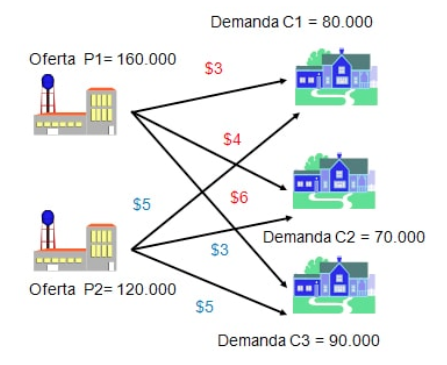

Luego de implementar este modelo en Solver de Excel se obtiene la Solución Óptima:

$X_{11}=80.000; X_{12}=40.000; X_{13}=0; X_{21}=0; X_{22}=30.000; X_{23}=90.000. $

El Valor Óptimo (mínimo costo) es de $940.000.